# Problem Set - Applied Statistics

### Anna Sophia Maxen (dhv202)

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy as scp
from iminuit import Minuit, cost
from IPython.core.display import Latex
import random
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [53]:
# General settings:
r = np.random                       # Random generator
r.seed(42)                          # Fixed order of random numbers

save_plots = False
verbose = True
N_verbose = 10


# MISSING FROM ALL PLOTS: TITLES

#### Problem 1

##### Problem 1.1

##### Problem 1.2

In [54]:
#defining the constant values
N = 365
l = 52.8
std = np.sqrt(l)

print(l + std)

60.06636084983398


In [55]:
def func_poisson_pmf(x, lamb):
    return scp.stats.poisson.pmf(x, lamb)

#survival function of a poisson distribution
def func_poisson_sf(x, lamb):
    return scp.stats.poisson.sf(x, lamb)

In [56]:


#a sigma is np.sqrt(lamb), but this constitutes 68% of the data. 
#We are interested in 60%, so that we can directly extract the  upper 20% of the data. 

desired_sigma = 30/np.sqrt(l)
#1 - 34.1
#x - 30

# figuring out which value from the distribution is the lower bound for the for the upper 20% of the distribution
threshold_value_busy_days = scp.stats.poisson.ppf(0.8, l)

# finding the survival function value at the threshold
sf_value_threshold = func_poisson_sf(threshold_value_busy_days, l)

print(f"Threshold value for upper 20%: {threshold_value_busy_days:.2f}")
print(f"Survival function value at threshold: {sf_value_threshold:.2f}")
# Calculate the corresponding number in the distribution with lambda = 52.8
corresponding_number = scp.stats.poisson.ppf(1 - sf_value_threshold, l)
#print(f"Corresponding number in the distribution: {corresponding_number}")

#Maximum customers:



#I do a cut-off at 3 sigma
upper_value_busy_days = scp.stats.poisson.ppf(0.999, l)
sf_value_upper = func_poisson_sf(upper_value_busy_days, l)
print(f"Upper value for 3 sigma: {upper_value_busy_days:.2f}")
print(f"Survival function value at upper value: {sf_value_upper:.2f}")

Threshold value for upper 20%: 59.00
Survival function value at threshold: 0.18
Upper value for 3 sigma: 77.00
Survival function value at upper value: 0.00


In [57]:
values = []
weights = []


#I want to calculate the average number of customers on a busy day
for i in range(int(upper_value_busy_days-threshold_value_busy_days)):
    values.append(i + threshold_value_busy_days)
    weights.append(func_poisson_pmf(i + threshold_value_busy_days, l))


mean_customers_busy = np.average(values, weights=weights)

print(f'The average number of customers on a busy day is: {mean_customers_busy:.2f}')

The average number of customers on a busy day is: 62.80


#### Problem 2

##### Problem 2.1

In [58]:
def weighted_mean(vals,sigs):
    values = np.array(vals)
    uncertainties = np.array(sigs)

    # Check if lengths match
    if len(values) != len(uncertainties):
        raise ValueError("Values and uncertainties must have the same length.")
    # Check for zero uncertainties to avoid division errors
    if np.any(uncertainties <= 0):
        raise ValueError("Uncertainties must be positive and non-zero.")

    # Calculate the weights
    weights = 1 / (uncertainties ** 2)
    # Calculate the weighted mean
    weighted_mean = np.sum(weights * values) / np.sum(weights)
    # Calculate the uncertainty of the weighted mean
    mean_uncertainty = np.sqrt(1 / np.sum(weights))
    
    return weighted_mean, mean_uncertainty

In [59]:
# Measurements in water

speed_of_sound = np.array([1532, 1458, 1499, 1394, 1432, 1565, 1474, 1440, 1507])
errors = np.array([67, 55, 74, 129, 84, 19, 10, 17, 14])

# Theoretical value
sos = 1481


In [60]:
#Naive average

naive_average_sos = np.mean(speed_of_sound)
naive_std_sos = np.sum(errors**2)/len(errors)

print(f'Naive: arithmetic mean and sum of quadrature of errors divided by number of errors: {naive_average_sos:.0f} +- {np.sqrt(naive_std_sos):.0f}')


#little bit less naive average

less_naive_average_sos = np.mean(speed_of_sound)
less_naive_std_sos = np.std(speed_of_sound, ddof=1)

print(f'Less naive: arithmetic mean and std: {less_naive_average_sos:.0f} +- {less_naive_std_sos:.0f}')

#least naive average, weighted mean

weighted_mean_sos, weighted_mean_uncertainty = weighted_mean(speed_of_sound, errors)

print(f'Weighted mean and errors on the weighted mean: {weighted_mean_sos:.0f} +- {weighted_mean_uncertainty:.0f}')

####here YOU HAVE TO THINK ABOUT YOUR ROUNDING

Naive: arithmetic mean and sum of quadrature of errors divided by number of errors: 1478 +- 65
Less naive: arithmetic mean and std: 1478 +- 53
Weighted mean and errors on the weighted mean: 1488 +- 7


In [61]:
#doing it for the first five, then the last four measurements

weighted_mean_sos_first, weighted_mean_uncertainty_first = weighted_mean(speed_of_sound[0:5], errors[0:5])

print(f'Weighted mean first five: {weighted_mean_sos_first:.2f} +- {weighted_mean_uncertainty_first:.2f}')

weighted_mean_sos_last, weighted_mean_uncertainty_last = weighted_mean(speed_of_sound[5:], errors[5:])

print(f'Weighted mean last four: {weighted_mean_sos_last:.2f} +- {weighted_mean_uncertainty_last:.2f}')

#combined weighted mean
combination_first_last = np.array([weighted_mean_sos_first, weighted_mean_sos_last])

combination_errors = np.array([weighted_mean_uncertainty_first, weighted_mean_uncertainty_last])

weighted_mean_sos_combined, weighted_mean_uncertainty_combined = weighted_mean(combination_first_last, combination_errors)

print(f'Weighted mean combined: {weighted_mean_sos_combined:.2f} +- {weighted_mean_uncertainty_combined:.2f}')
print(f'Theoretical value: {sos}')
print(f'Precision of the first five measurements: {np.abs(sos - weighted_mean_sos_first):.2f}')
print(f'Precision of the last four measurements: {np.abs(sos - weighted_mean_sos_last):.2f}')
print(f'Precision of the combined measurements: {np.abs(sos - weighted_mean_sos_combined):.2f}')

Weighted mean first five: 1475.53 +- 32.66
Weighted mean last four: 1488.19 +- 6.85
Weighted mean combined: 1487.66 +- 6.70
Theoretical value: 1481
Precision of the first five measurements: 5.47
Precision of the last four measurements: 7.19
Precision of the combined measurements: 6.66


Precision-wise the first five measurements give a value closer to the theoretical value. They have a very lousy accuracy though, with an error from the weighted mean of $\pm 32.66$.

Checking for consistency between the values:

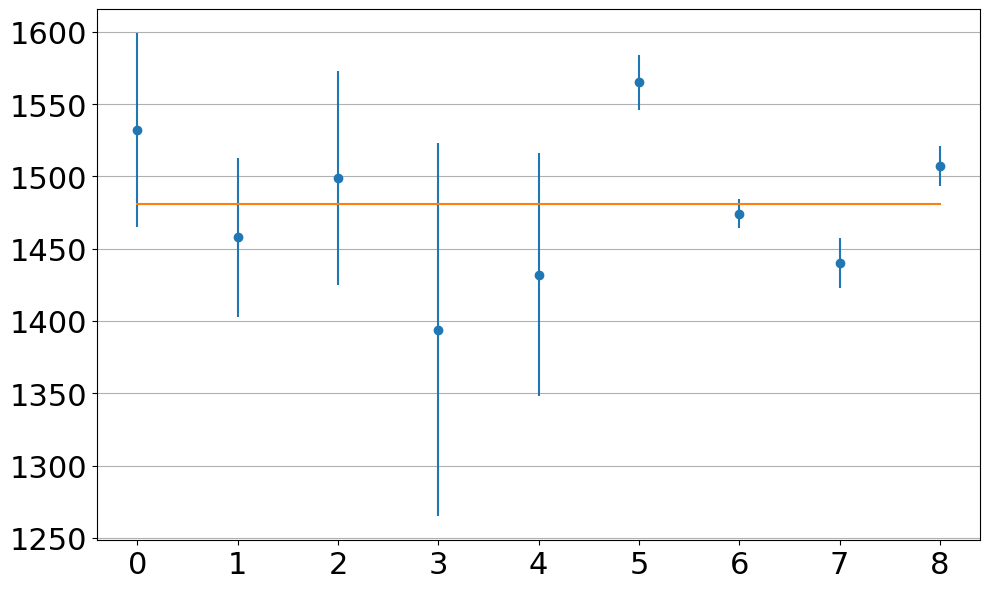

In [62]:
#check for consistency between the measurements
n = range(len(speed_of_sound))
x = np.linspace(1481, 1481, 9) 

plt.figure(figsize=(10, 6))

plt.errorbar(n, speed_of_sound, yerr=errors, fmt='o')

plt.plot(n, x)

plt.plot()

plt.tick_params(axis='both', which='major', labelsize=22)

plt.grid(axis='y')

plt.tight_layout()
#plt.savefig('pend_t_fit.png')

In [63]:
#Chauvenet's criterion, except it doesn't work for so few data points. Maybe I would take some of the points away more manually.

#new_sos = Chauvenets(speed_of_sound)


##### Problem 2.2

In [64]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

def error_prop_general(f, vars, dvars, **kwargs):
    """General error propagation for a function of two variables
    
    Parameters
    ----------
    f : function
        The function to calculate the error for
    x : float
        The value of the first variable
    dx : float
        The error on the first variable
    y : float
        The value of the second variable
    dy : float
        The error on the second variable
    kwargs : dict
        Additional keyword arguments for the function
        
    Returns
    -------
    float
        The error on the function
    """
    # Calculate the derivatives with respect to each variable
    dfs = []

    for i in range(len(vars)):
        dfs.append(diff(f, vars[i]))
    
    # Calculate the error
    error = sqrt(([dfs[i] + dvars[i] for i in range(len(dfs))])**2)
    
    return error

In [65]:
#Defining the variables

mu_A = 1.01
sigma_A = 0.19
mu_gamma = 0.12
sigma_gamma = 0.05
mu_omega = 0.47
sigma_omega = 0.06
t = 1

In [66]:

#Doing latex magic
A, gamma, omega, time = symbols("A, gamma, omega, t")
dA, dgamma, domega, dtime = symbols("sigma_A, sigma_gamma, sigma_omega, sigma_t")
dx_A,dx_gamma,dx_omega = symbols("sigma_x^A,sigma_x^gamme,sigma_x^omega")
    
# Define relation, and print:
x_af_t = A * exp(-time * gamma) * cos(omega * time)
lprint(latex(Eq(symbols('x_af_t'),x_af_t)))
    
# Calculate uncertainty and print:
dx_af_t = sqrt(x_af_t.diff(A)**2 * dA**2 + x_af_t.diff(gamma)**2 * dgamma**2 + x_af_t.diff(omega)**2 * domega**2)
dx_A = sqrt(x_af_t.diff(A)**2 * dA**2)
dx_gamma = sqrt(x_af_t.diff(gamma)**2 * dgamma**2)
dx_omega = sqrt(x_af_t.diff(omega)**2 * domega**2)

lprint(latex(Eq(symbols('sigma_x_(t)'), dx_af_t)))
lprint(latex(Eq(symbols('sigma_x^A'), dx_A)))
lprint(latex(Eq(symbols('sigma_x^gamma'), dx_gamma)))
lprint(latex(Eq(symbols('sigma_x^omega'), dx_omega)))
    
# Turn expression into numerical functions 
fx_af_t = lambdify((A, gamma, omega, time),x_af_t)
fdx_af_t = lambdify((A,dA,gamma, dgamma, omega, domega, time, dtime),dx_af_t)
    
# Define values and their errors
vA, vdA = mu_A, sigma_A
vgamma, vdgamma = mu_gamma, sigma_gamma
vomega, vdomega = mu_omega, sigma_omega
vt, vdt = t, 0

    
# Numerically evaluate expressions and print 
vx_af_t = fx_af_t(vA, vgamma, vomega, vt)
vdx_af_t = fdx_af_t(vA, vdA, vgamma, vgamma, vomega, vdomega, vt, vdt)
lprint(fr'x(t) = ({vx_af_t:.4f} \pm {vdx_af_t:.4f})')
lprint(fr'A = ({vA:.4f} \pm {vdA:.4f})')
lprint(fr'gamma = ({vgamma:.4f} \pm {vdgamma:.4f})')
lprint(fr'omega = ({vomega:.4f} \pm {vdomega:.4f})')




<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [67]:

print(f'The value of the function at t=1 is: {vx_af_t:.2f} +- {vdx_af_t:.2f}')



The value of the function at t=1 is: 0.80 +- 0.18


In [68]:

mu_A = 1.01
sigma_A = 0.19
mu_gamma = 0.12
sigma_gamma = 0.05
mu_omega = 0.47
sigma_omega = 0.06
t = 1

times = np.linspace(0, 30, 100)

A_s = np.zeros(len(times))
gamma_s = np.zeros(len(times))
omega_s = np.zeros(len(times))

for i in range(len(times)):
    A_s[i] = dx_A.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i]})
    gamma_s[i] = dx_gamma.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i]})
    omega_s[i] = dx_omega.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i]})

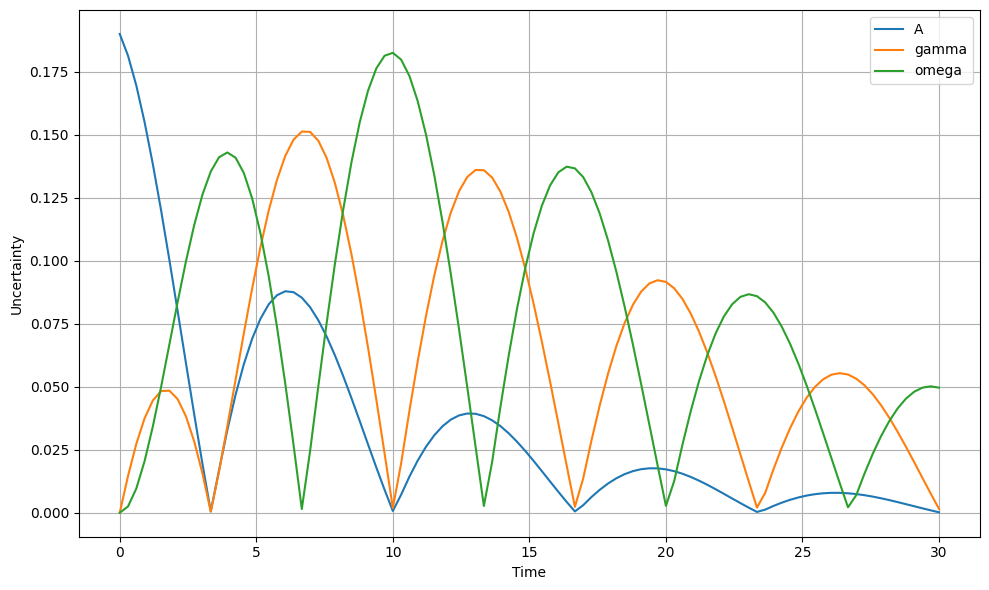

In [69]:
#now we want to plot the different uncertainties as a function of time

plt.figure(figsize=(10, 6))
plt.plot(times, A_s, label='A')
plt.plot(times, gamma_s, label='gamma')
plt.plot(times, omega_s, label='omega')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Uncertainty')
plt.grid()
plt.tight_layout()
plt.show()

#### Problem 3

##### Problem 3.1

In [70]:
def probability_of_scoring(aim):
    if np.abs(aim) < 4:
        p = np.abs(aim)/4
    elif np.abs(aim) >= 4:
        p = 0
    return p

print(f'The probability of scoring a goal is: {probability_of_scoring(2.5):.2f}')

The probability of scoring a goal is: 0.62


In [71]:
border = 4

def pdf_of_shot(aim, border):
    return (scp.stats.norm.cdf(border, aim, 1) - scp.stats.norm.cdf(-border, aim, 1))*probability_of_scoring(aim)

In [72]:
p = pdf_of_shot(0.3, border)
print(p)

0.07499127452707886


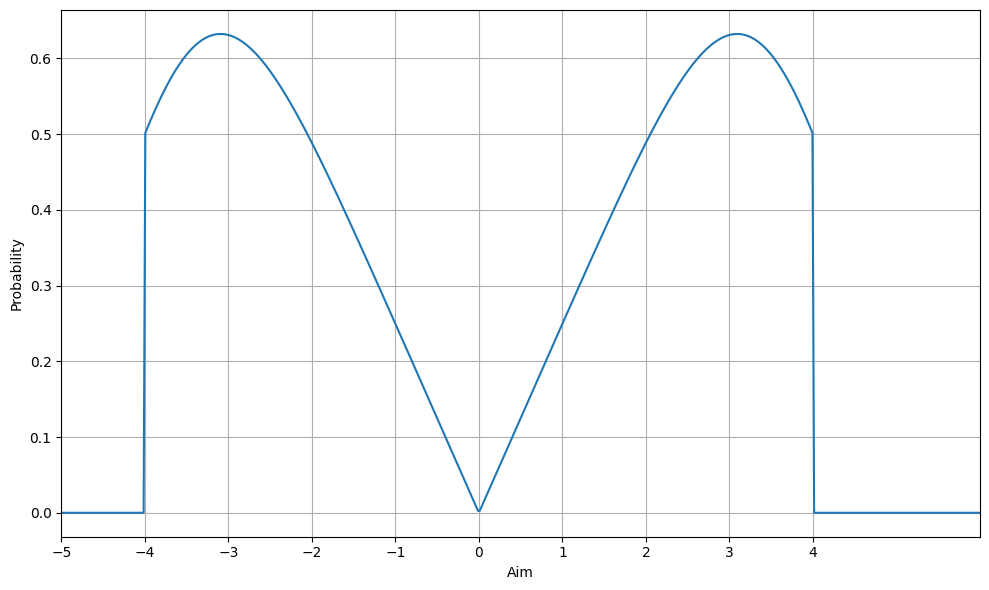

In [73]:
#plotting the custom probability density function

aim = np.linspace(-10, 10, 1000)

plt.figure(figsize=(10, 6))
plt.plot(aim, [pdf_of_shot(i, border) for x,i in enumerate(aim)])
plt.xlabel('Aim')
plt.ylabel('Probability')
plt.xlim(-5, 6)
plt.xticks(np.arange(-5, 5, 1))
plt.grid()
plt.tight_layout()
plt.show()

In [74]:
#Finding the maximum of the function

max_aim = scp.optimize.minimize(lambda x: -pdf_of_shot(x, border), 0).x

print(f'The aim with maximum probability of scoring is: +- {max_aim[0]:.2f}')
print(f'The probability of scoring a goal with this aim is: {pdf_of_shot(max_aim[0], border):.2f}')

The aim with maximum probability of scoring is: +- 3.09
The probability of scoring a goal with this aim is: 0.63


##### Problem 3.2

Detertmining the normalization constant of our pdf

In [75]:
#getting the normalization constant from monte carlo simulation
def func_pdf_unnormalized(x):
    return (np.arctan(x)) + (np.pi/2)

N = 100000

xmin = -3.0 
xmax = 3.0  

xs = np.linspace(xmin, xmax, N)
ys = np.array([func_pdf_unnormalized(x) for x in xs])

x_box = np.random.uniform(xmin, xmax, N)
y_box = np.random.uniform(np.min(ys), np.max(ys), N)

x_accept = []
y_accept = []

N_try = 0

for i in range(N):

    if y_box[i] < func_pdf_unnormalized(x_box[i]):
        N_try += 1
        x_accept.append(x_box[i])
        y_accept.append(y_box[i])

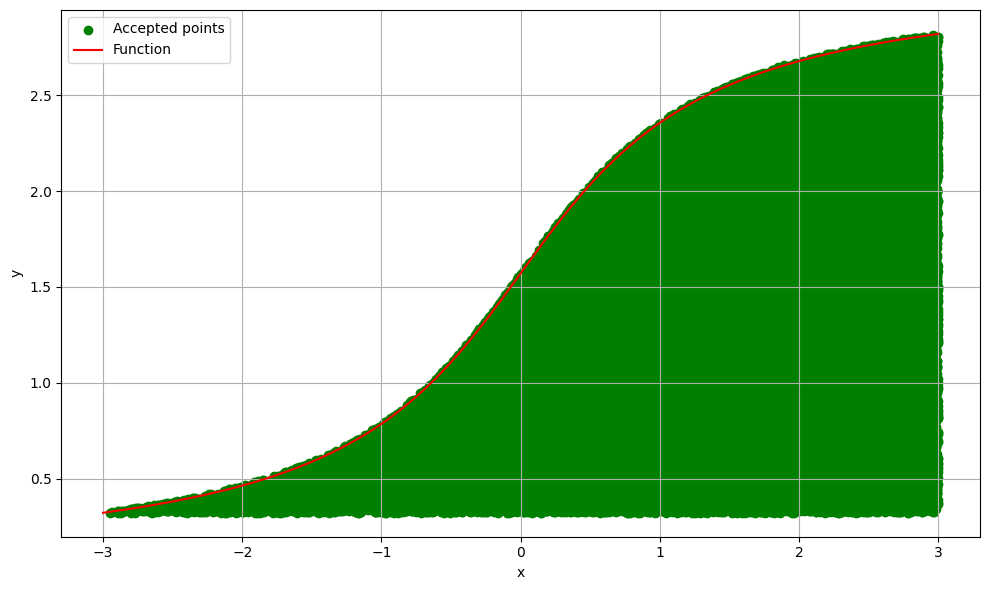

In [76]:
#Plotting the function and the accepted points

plt.figure(figsize=(10, 6))
plt.scatter(x_accept, y_accept, color='g', label='Accepted points')
plt.plot(xs, ys, color = 'red', label='Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [77]:
#Getting the normalization constant
# Efficiency
eff = N_try / N                         

# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N) 

# Integral
integral =  eff * (xmax-xmin) * (np.max(ys) - np.min(ys))

# Error on integral
eintegral = eff_error * (xmax-xmin) * (np.max(ys) - np.min(ys))  

print(eff, integral)

0.49928 7.483482878916006


The normalization constant will ensure that our pdf has an area of 1, so it will be 1/integral

In [78]:
Cpdf_from_mc = 1/integral
print(f'The normalization constant from Monte Carlo simulation is: {Cpdf_from_mc:.2f}')

The normalization constant from Monte Carlo simulation is: 0.13


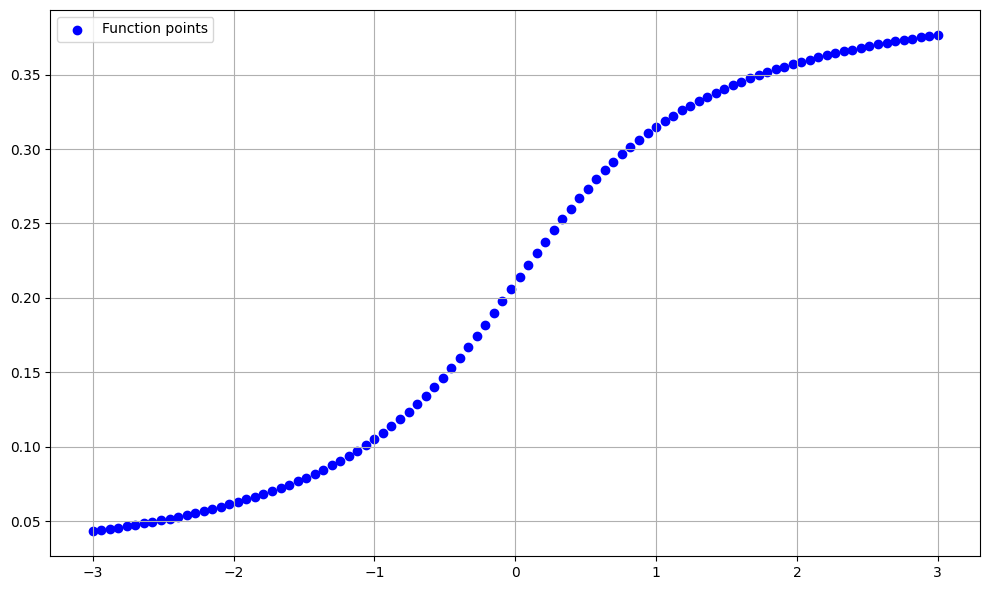

In [79]:
#producing 100 points along the function
def func_pdf(x, C):
    return C*((np.arctan(x)) + (np.pi/2))

N_func = 100

x_func = np.linspace(xmin, xmax, N_func)
y_func = np.array([func_pdf(x, Cpdf_from_mc) for x in x_func])

#plotting the points

plt.figure(figsize=(10, 6))
plt.scatter(x_func, y_func, color='blue', label='Function points')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Having these data points, I will fit the function to them with a least sq. fit, and get minuit to extract the parameter C, which I can then compare to the Cpdf from Monte Carlo simulation. To do a least squares fit, I will have to estimate errors on the data points I just created. As a basic assumption, I will assign them Gaussian errors, with a small std. I don't assume there is a lot of error in these. 

In [80]:
#creating the gaussian errors for the points
errors = np.random.normal(0, 0.1, N_func)


#Doing the minuit fit

pdf_fit = cost.LeastSquares(x_func, y_func, errors, func_pdf)
mfit = Minuit(pdf_fit, C = 1)
mfit.migrad()

##FÅ FITTET TIL Å FUNKE

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.036e-12 (χ²/ndof = 0.0)  │              Nfcn = 15               │
│ EDM = 8.04e-12 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ C    │ 133.63e-3 │  0.05e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        C │
├───┼──────────┤
│ C │ 2.87e-09 │
└───┴──────────┘

In [81]:
c_fit = mfit.values[0]

print(f'The normalization constant from the fit is: {c_fit:.2f}')

The normalization constant from the fit is: 0.13


In [82]:
###Get them to the decimal place where they differ and compare.

#### Problem 4

##### Problem 4.1

In [265]:
#reading the data file 

dataframe = pd.read_csv('data_LargestPopulation.csv', header=0)
Year, PopIndia, PopChina = dataframe.values.T

desired_year_range_df = dataframe[3:14]

desired_year_range_df

,Year,PopIndia,PopChina
3,1963,477933630,683903550
4,1964,489059300,704593800
5,1965,500114340,723846340
6,1966,510992600,742948540
7,1967,521987070,761006300
8,1968,533431900,780372000
9,1969,545314700,801431000
10,1970,557501300,822534460
11,1971,569999170,843285440
12,1972,582837950,862840400


In [34]:
#for i in range(10):
#    print(f"  Year: {int(Year[i]):4d}   PopIndia{PopIndia[i]:9.0f}   PopChina = {PopChina[i]:9.0f}")

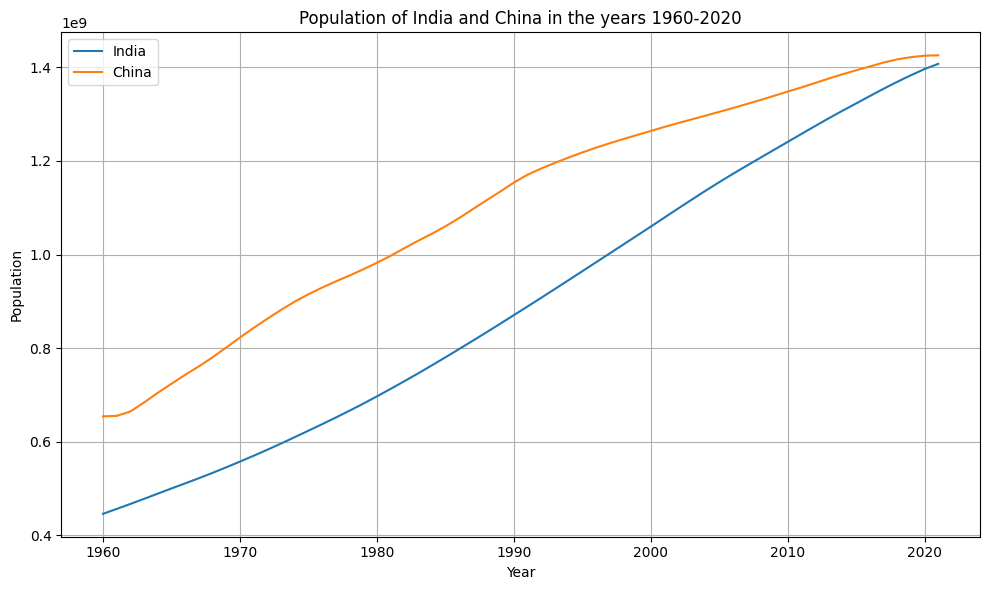

In [35]:
#plotting the data 

plt.figure(figsize=(10, 6))
plt.plot(Year, PopIndia, label='India')
plt.plot(Year, PopChina, label='China')
plt.title('Population of India and China in the years 1960-2020')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),)


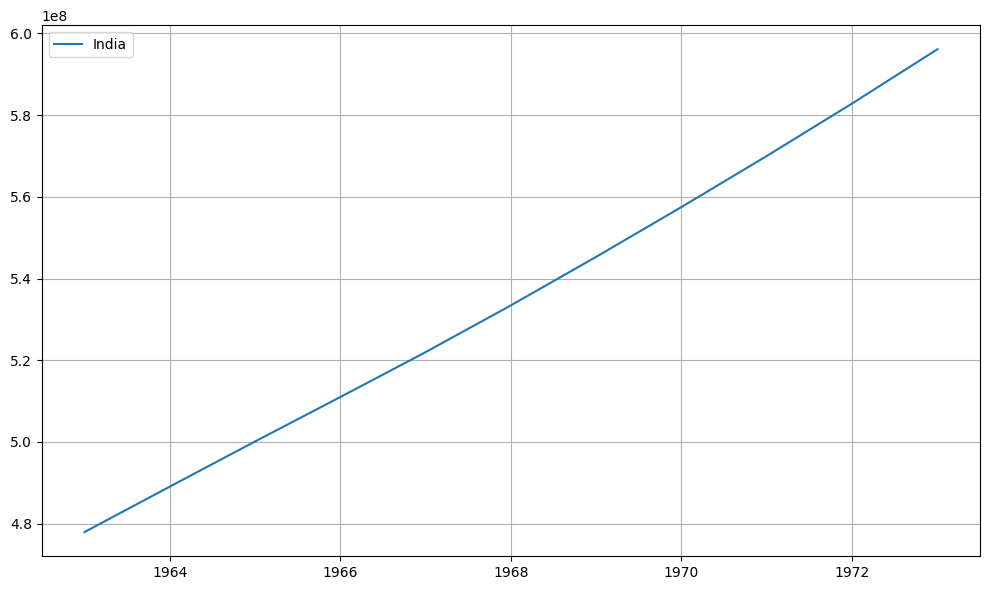

In [39]:
#Plotting the data from years 1963-1973

desired_year_range = np.where((Year >= 1963) & (Year <= 1973))
print(desired_year_range)

plt.figure(figsize=(10, 6))
plt.plot(Year[desired_year_range], PopIndia[desired_year_range], label='India')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

/Users/annasophiamaxen/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7685.
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           1.66e-14
Time:                        12:35:01   Log-Likelihood:                 8.8577
No. Observations:                  11   AIC:                            -13.72
Df Residuals:                       9   BIC:                            -12.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1922.5010      0.520   3695.

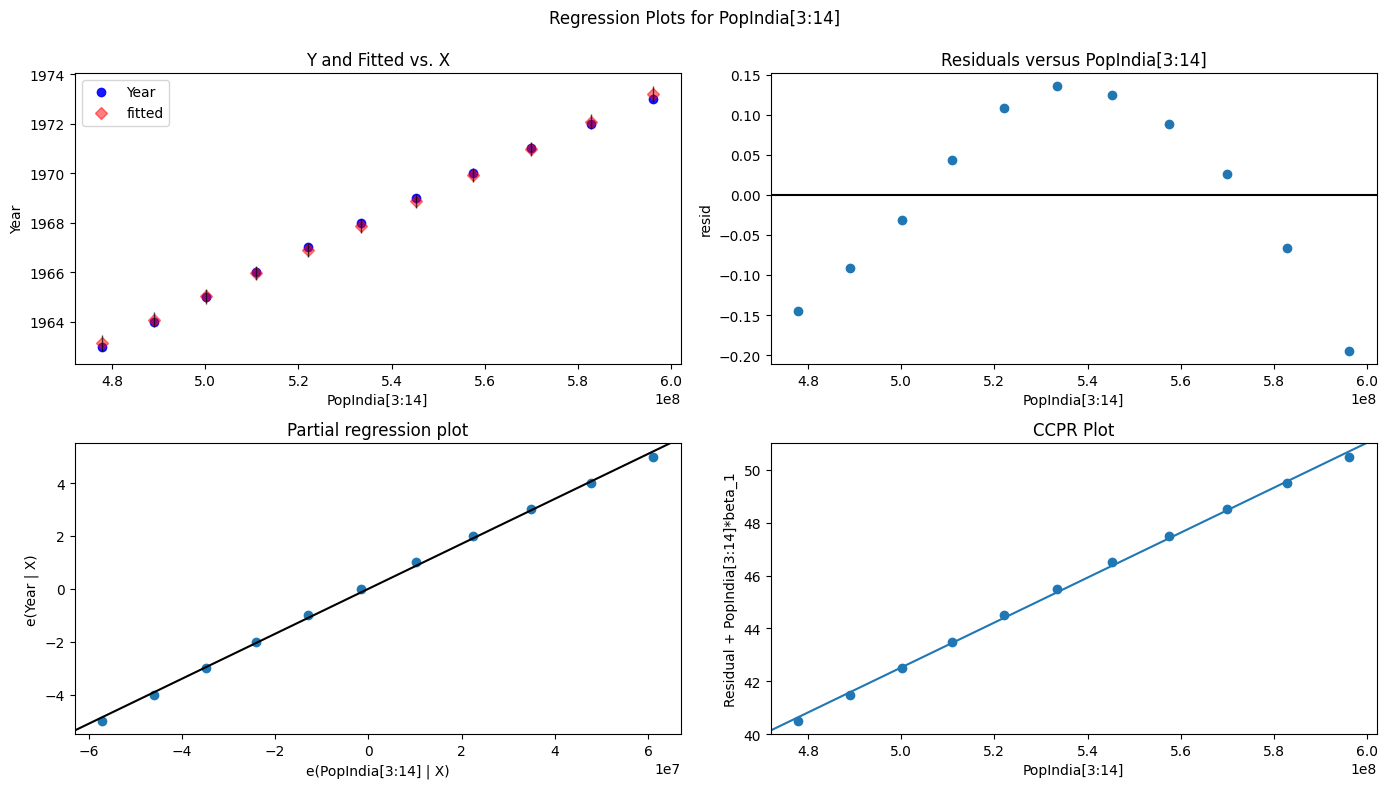

In [111]:
#Fitting the data for india in the desired year range linearly

def linear(x, a, b):
    return a*x + b

#I assume the error is the square root of the population since these must be poisson distributed.
#Each of them is a count of people, which is a poisson distribution with lambda = population.


# fit simple linear regression model 
linear_model = ols('Year ~ PopIndia[3:14]', 
                   data=desired_year_range_df).fit() 
  
# display model summary 
print(linear_model.summary()) 
  
# modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(linear_model, 
                                    'PopIndia[3:14]', fig=fig)

In [112]:
#doing it also with a least squares fit

# Fit the data
linear_fit_india = cost.LeastSquares(Year[desired_year_range], PopIndia[desired_year_range], np.sqrt(PopIndia[desired_year_range]), linear)

mfit = Minuit(linear_fit_india, a = 1, b = 1)
mfit.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.268e+04 (χ²/ndof = 3630.8)│              Nfcn = 60               │
│ EDM = 1.15e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 11.7212e6 │ 0.0022e6  │            │            │         │         │       │
│ 1 │ b    │ -22.532e9 │  0.004e9  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 4.85e+06 -9.550e9 │
│ b │ -9.550e9 1.88e+13 │
└───┴───────────────────┘

In [139]:
Year[desired_year_range][i]

np.int64(1973)

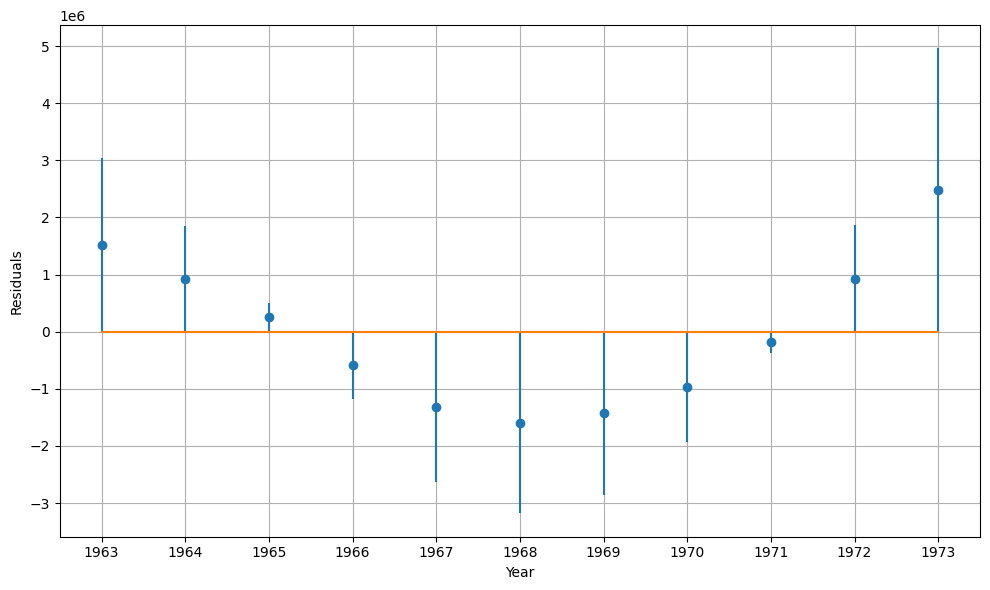

In [173]:
#manually calculating the residuals

residuals = PopIndia[desired_year_range] - linear(Year[desired_year_range], mfit.values[0], mfit.values[1])

errs = np.abs(residuals)
#plotting the residuals

plt.figure(figsize=(10, 6))
plt.errorbar(Year[desired_year_range], residuals, yerr=errs, label='Residuals', fmt='o')
plt.xlabel('Year')
#plotting the expected value of the residuals
plt.plot(Year[desired_year_range], np.zeros(len(Year[desired_year_range])), label='Expected value')
plt.xticks(np.arange(1963, 1974, 1))
plt.ylabel('Residuals')
plt.grid()
plt.tight_layout()
plt.show()

Assuming an uncertainty of +- 1000000, model both populations and estimate when the indian population becomes larger then the chinese.

In [177]:
assumed_uncert = np.ones(len(Year))*10**6

# Fitting the data for the entire year range

fit_india = cost.LeastSquares(Year, PopIndia, assumed_uncert, linear)
fit_chinese = cost.LeastSquares(Year, PopChina, assumed_uncert, linear)

mfit_india = Minuit(fit_india, a = 1, b = 1)
mfit_china = Minuit(fit_chinese, a = 1, b = 1)

mfit_india.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.627e+04 (χ²/ndof = 437.9)│              Nfcn = 70               │
│ EDM = 6.24e-11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 16.710e6  │  0.007e6  │            │            │         │         │       │
│ 1 │ b    │ -32.362e9 │  0.014e9  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  5.04e+07 -100.27e9 │
│ b │ -100.27e9     2e+14 │
└───┴─────────────────────┘

We need to try to fit with a non-linear function

In [273]:
#fitting with a non-linear model

def func_indian_growth(x, a, b, phi1):
    return (a*x + b) * np.exp(phi1 * (x - 1960)) 

fit_india_nonlinear = cost.LeastSquares(Year, PopIndia, assumed_uncert, func_indian_growth)
mfit_india_nonlinear = Minuit(fit_india_nonlinear, a = 0, b = 0, phi1 = 0.000)
mfit_india_nonlinear.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.142e+04 (χ²/ndof = 193.6)│              Nfcn = 443              │
│ EDM = 1.4e-05 (Goal: 0.0002)     │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  12.22e6  │  0.04e6   │            │            │         │         │       │
│ 1 │ b    │ -23.53e9  │  0.08e9   │            │            │         │         │       │
│ 2 │ phi1 │ 3.481e-3  │ 0.032e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬───────────────────────────────────────────────────────┐
│      │                 a                 b              phi1 │
├──────┼───────────────────────────────────────────────────────┤
│    a │          1.46e+09        -2.8756e12     -1.1958931597 │
│    b │        -2.8756e12          5.66e+15 2.3521336614655e3 │
│ phi1 │     -1.1958931597 2.3521336614655e3          1.01e-09 │
└──────┴───────────────────────────────────────────────────────┘

In [186]:
mfit_china.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.88e+04 (χ²/ndof = 1480.0)│              Nfcn = 81               │
│ EDM = 5.84e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 13.170e6  │  0.007e6  │            │            │         │         │       │
│ 1 │ b    │ -25.108e9 │  0.014e9  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  5.23e+07 -104.19e9 │
│ b │ -104.19e9  2.07e+14 │
└───┴─────────────────────┘